Nama : Muhammad Nur Ihsan Effendi
NIM : 10320041

In [1]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Mendefinisikan konstanta gravitasi (dalam MKS)
G = 6.67 * 10**(-11)

# Mendefinisikan fungsi waktu keruntuhan awan terhadap radius
def time (theta, rho_0):

  chi = ((8*np.pi*G*rho_0)/3)**0.5      # konstanta chi yang bergantung kerapatan awan mula-mula (persamaan 2)
  x = np.arccos(theta**0.5)             # variabel xi yang didefinisikan sebagai fungsi dari theta
  t = ((((np.sin(2*x))/2) + x) / chi)   # waktu keruntuhan awan dalam satuan detik (persamaan 5)
  t_years = t/(365*24*60*60)            # mengubah t ke dalam satuan tahun

  return t_years

# Mendefinisikan fungsi untuk menghitung waktu jatuh bebas (free fall)
def time_ff(rho_0):

  t_ff = ((3*np.pi)/(32*G*rho_0))**0.5 # waktu free fall dalam satuan detik (persamaan 6)
  t_ff_years = t_ff/(365*24*60*60)     # waktu free fall dalam satuan tahun

  return t_ff_years

In [3]:
# Inisiasi Array Kosong

t_arr_513 = []           # array t untuk awan dengan densitas 5x10e-13 kg/m3
t_arr_113 = []           # array t untuk awan dengan densitas 10e-13 kg/m3
t_arr_514 = []           # array t untuk awan dengan densitas 5x10e-14 kg/m3

t_tff_arr_513 = []       # array t/tff untuk awan dengan densitas 5x10e-13 kg/m3
t_tff_arr_113 = []       # array t/tff untuk awan dengan densitas 10e-13 kg/m3
t_tff_arr_514 = []       # array t/tff untuk awan dengan densitas 5x10e-14 kg/m3

# Mendefinisikan array yang berisi densitas awan mula-mula
rho_0_arr = [5*(10**(-13)), 10**(-13), 5*(10**(-14))]

# Mendefinisikan array yang berisi theta dari 1 sampai 0
theta_arr = np.linspace(1, 0, 101)

# Looping untuk menghitung t, pada theta yang didefinisikan dari 1 sampai 0
for i in range(3):
  rho_0 = rho_0_arr[i]
  tff = time_ff(rho_0)
  
  for j in range (100, -1, -1):     # loop hanya dapat digunakan dalam rentang bilangan integer
    theta = j/100                   # theta dari 1 sampai 0
    T = time(theta, rho_0)

    # Mengisi array untuk dibuat plot

    if rho_0 == 5*(10**(-13)):
      t_arr_513.append(T)
      t_tff_arr_513.append(T/tff)

    elif rho_0 == (10**(-13)):
      t_arr_113.append(T)
      t_tff_arr_113.append(T/tff)

    else: # rho_0 == 5*(10**(-14)):
      t_arr_514.append(T)
      t_tff_arr_514.append(T/tff)


In [4]:
# Inisiasi array densitas awan per densitas awan mula-mula
rho_rho0_arr = []

# Looping untuk menghitung rho/rho0
for k in range (100, 0, -1):        # batas bawah diubah dari semula 0  menjadi 1, karena pembagian dengan 0 akan menghasilkan nilai yang tak terdefinisi
  theta = k/100                     # theta yang sama seperti sebelumnya
  rho_rho0 = 1/(theta**3)           # (persamaan 7)
  rho_rho0_arr.append(rho_rho0)

# Karena panjang array rho/rho0 satu lebih sedikit daripada panjang array t/tff, maka array rho/rho0 ditambah secara manual, dengan nilai yang mendekati tak hingga
rho_rho0_arr.append(1000000)

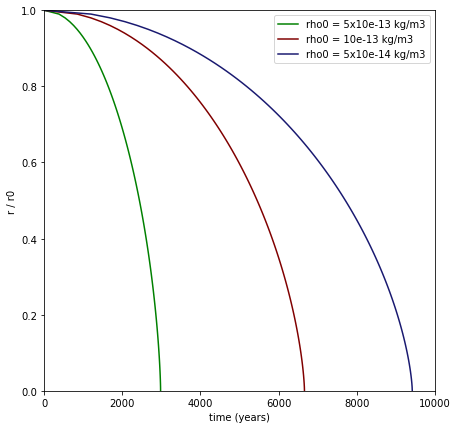

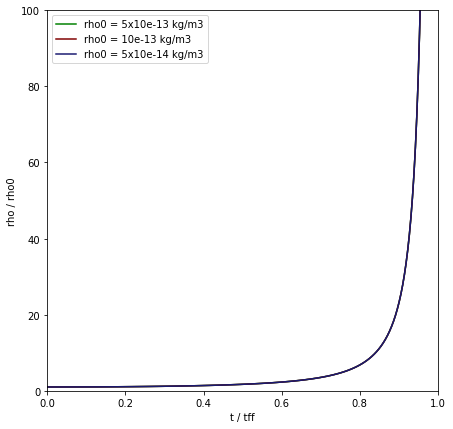

In [5]:
# Membuat plot theta (r/r0) terhadap t

plt.figure(figsize=(7,7))
plt.plot(t_arr_513, theta_arr, c="green", label="rho0 = 5x10e-13 kg/m3")
plt.plot(t_arr_113, theta_arr, c="maroon", label="rho0 = 10e-13 kg/m3")
plt.plot(t_arr_514, theta_arr, c="midnightblue", label="rho0 = 5x10e-14 kg/m3")
plt.xlabel("time (years)")
plt.ylabel("r / r0")
plt.legend(loc='upper right')
plt.xlim(0, 10000)
plt.ylim(0,1)
plt.show()

print()
# Membuat plot t/tff terhadap rho/rho0

plt.figure(figsize=(7,7))
plt.plot(t_tff_arr_513, rho_rho0_arr, c="green", label="rho0 = 5x10e-13 kg/m3")
plt.plot(t_tff_arr_113, rho_rho0_arr, c="maroon", label="rho0 = 10e-13 kg/m3")
plt.plot(t_tff_arr_514, rho_rho0_arr, c="midnightblue", label="rho0 = 5x10e-14 kg/m3")
plt.xlabel("t / tff")
plt.ylabel("rho / rho0")
plt.legend(loc='upper left')
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.show()

